**Fill-outline invariance** (FOI) means that the unit is sensitive only to the boundary curvature at a certain spatial orientation, and not to the texture of the object. For a perfectly invariant unit, its response $R(\cdot)$ should be the same given a hollow or filled closed shape. We will denote that as:

\begin{equation}
R(s_h) = R(s_f)
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import handytools.navigator as nav

In [42]:
def plot_pearson_r2(mtype, key):
    an_metrics = nav.pklload("/src", "results", f"{mtype}_fillholl_rotated_key={key}_lw=1", "fit_metrics.pkl")
    an_metrics_array = np.asarray(list(an_metrics.values())) # shape = (# responsive units, # metrics)

    fig = plt.figure(figsize=(9, 3))
    ax1 = fig.add_subplot(131)
    ax1.hist(an_metrics_array[:,0], color="k")

    ax2 = fig.add_subplot(132)
    r2_filtered = np.maximum(an_metrics_array[:,2], 0) # ReLU(r^2)
    ax2.hist(r2_filtered, color="k")

    ax3 = fig.add_subplot(133)
    ax3.scatter(an_metrics_array[:,0], r2_filtered, color="k", s=5)

    ax1.set_title("\u03C1"); ax2.set_title("$r^2$")
    ax3.set_xlabel("\u03C1"); ax3.set_ylabel("$r^2$"); ax3.set_title("$r^2$ vs \u03C1")
    
    mname_dic = {"AN": "Alexnet", "VGG16": "VGG16"}
    key_to_layer = {"AN": {8: "Conv 4"},
                   "VGG16": {8: "Conv 4", 11: "Conv 5", 13: "Conv 6", 16: "Conv 7", 18: "Conv 8"}}
    plt.suptitle(f"Fill-Outline Invariance for {mname_dic[mtype]} {key_to_layer[mtype][key]} units")
    plt.tight_layout()
    plt.show()

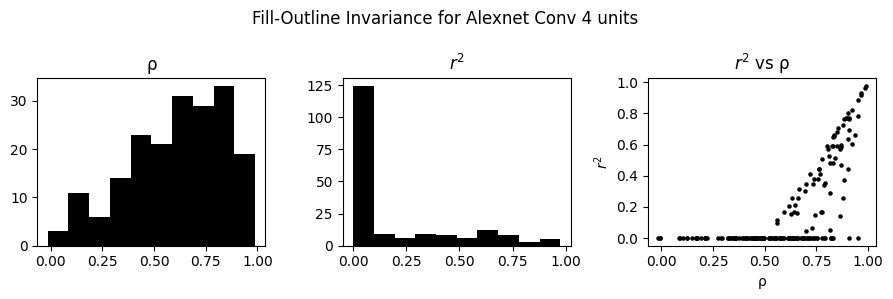

In [36]:
plot_pearson_r2("AN", 8)

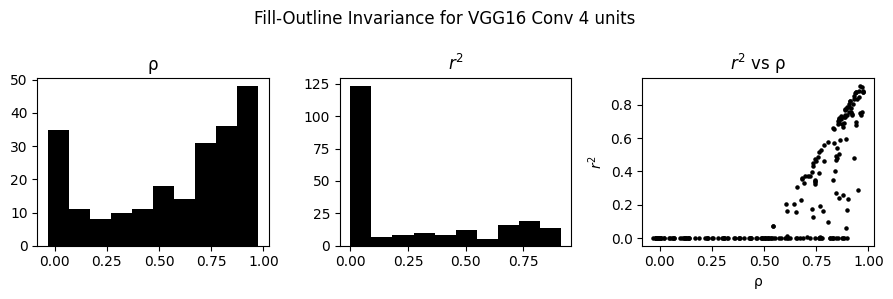

In [37]:
plot_pearson_r2("VGG16", 8)

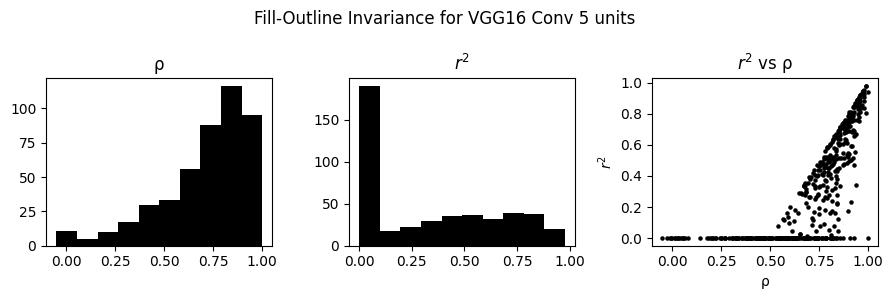

In [38]:
plot_pearson_r2("VGG16", 11)

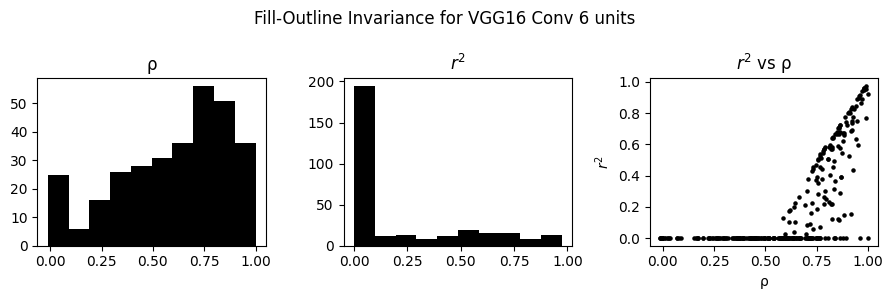

In [43]:
plot_pearson_r2("VGG16", 13)

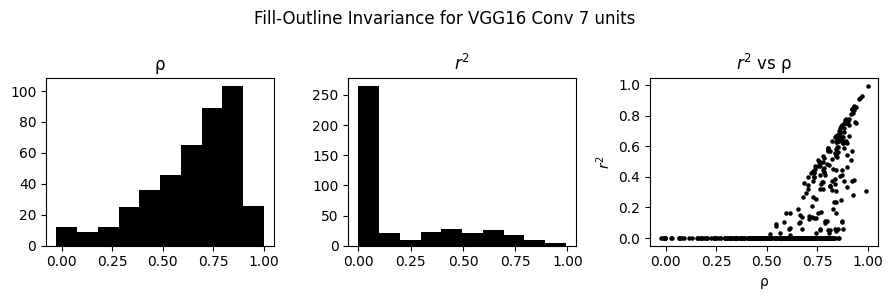

In [44]:
plot_pearson_r2("VGG16", 16)

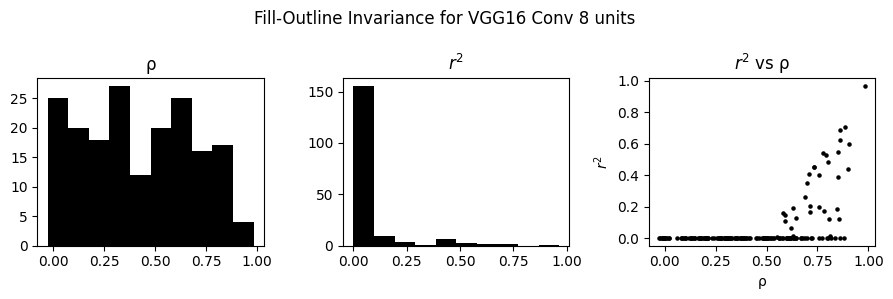

In [39]:
plot_pearson_r2("VGG16", 18)